In [1]:
# importing the needed packages
import warnings                     # Module to suppress warning                              
warnings.filterwarnings('ignore')   # Never display warnings which match
warnings.simplefilter("ignore")     # Filterwarnings(action, category=DeprecationWarning)

# Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

from sklearn.cluster import KMeans

import glob # use to find files
import matplotlib.pyplot as plt
import numpy as np
import os   # The OS module provides functions for interacting with the operating system
import pandas as pd

import seaborn as sns
sns.set()

import statsmodels.api as sm
import sys  # This module gives access to system-specific parameters and functions

import folium

# Clustering

Cluster analysis is a multivariate statistical technique that groups observations on the basis of some of the features or variables that they are described by.

The goal of clustering is to maximize the similarity of observations within a cluster and maximize the dissimilarity between clusters.

### This project is mainly focused on the K-means

**K-means clustering** 

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset.

**Conventional k-means require only a few steps.**

The K-means algorithm works as follows:
i. The number of clusters k to be assigned is specified
ii. Then randomly initialize the k, i.e specify the number of seeds. A seed is a starting centroid (can be chosen at random, with an algorithm, or according to some prior knowledge)
iii. This is repeated until the centroid position no longer changes. 


**PROS**

• It is simple to implement 

• It is computationally efficient 

• It is widely used 

• it always yields a result, this may be misleading in some cases

**CONS**

• K must be picked. This may be difficult to determine.

• It is sensitive to initialize 


In [2]:
import chardet

with open('Nations.csv', 'rb') as f:
    enc = chardet.detect(f.read())  
    
data = pd.read_csv('Nations.csv', encoding = enc['encoding'])
data.head()

,CountryCodes,Country,Continent,Latitude,Longitude,Region Code,Language,CountryCurrency
0,AFG,Afghanistan,Asia,33.831475,66.026218,142,Others,AFN
1,ALA,Åland Islands,Europe,60.178500,19.915600,150,Others,EUR
2,ALB,Albania,Europe,41.131809,20.068825,150,Others,ALL
3,DZA,Algeria,Africa,28.164745,2.633512,2,Arabic,DZD
4,ASM,American Samoa,Oceania,-14.304405,-170.707830,9,Others,USD


In [3]:
# Viewing the shape of the data.
data.shape

(248, 8)

In [4]:
# Checking the data to have an insight of the features and target
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CountryCodes     248 non-null    object 
 1   Country          248 non-null    object 
 2   Continent        248 non-null    object 
 3   Latitude         248 non-null    float64
 4   Longitude        248 non-null    float64
 5   Region Code      248 non-null    int64  
 6   Language         248 non-null    object 
 7   CountryCurrency  248 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 15.6+ KB


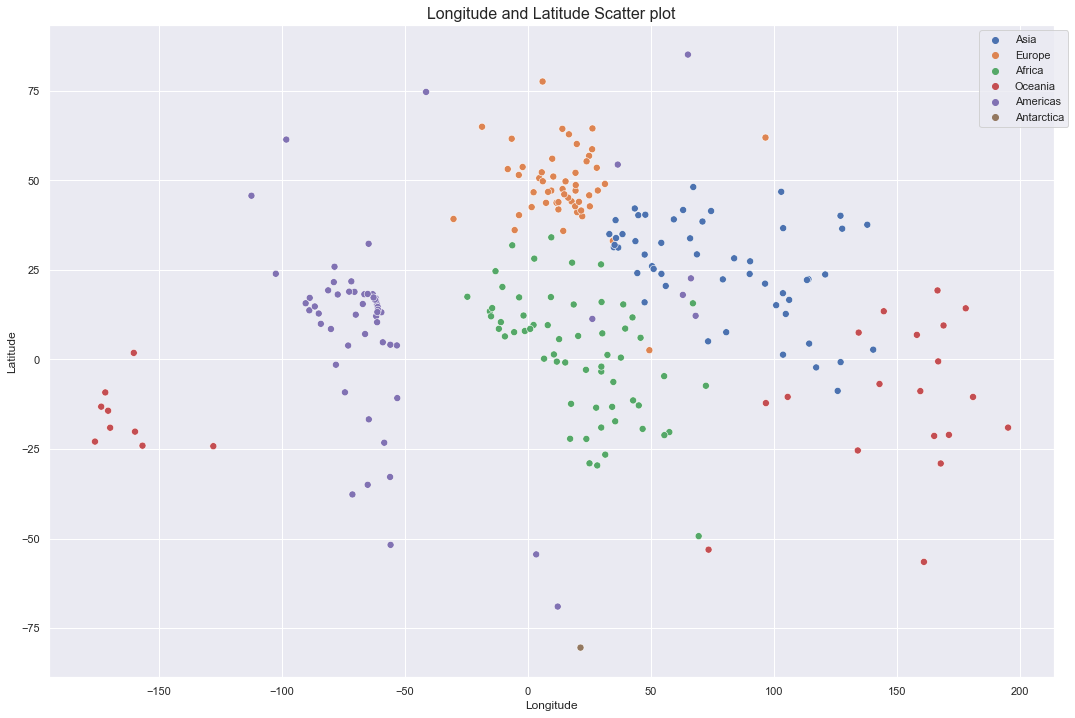

In [5]:
# Scatter Plot
plt.figure(figsize=(18,12))
sns.scatterplot(x = 'Longitude', y = 'Latitude', s = 50, hue = 'Continent', data=data)
plt.legend(bbox_to_anchor=(1.02, 1)) # move legend to outside of the chart
plt.title('Longitude and Latitude Scatter plot', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

## Select the features

In [6]:
X = data.iloc[:,3:5]
X

,Latitude,Longitude
0,33.831475,66.026218
1,60.178500,19.915600
2,41.131809,20.068825
3,28.164745,2.633512
4,-14.304405,-170.707830
...,...,...
243,14.293800,178.116500
244,24.662953,-13.134257
245,15.965064,47.503053
246,-13.453692,27.800396


In [7]:
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(6) # I am choosing 6 to correspond with the number of continents

In [8]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(X) 

KMeans(n_clusters=6)

### Clustering Resutls

In [9]:
# Create a variable which will contain the predicted clusters for each observation
clusters_results = kmeans.fit_predict(X)
# Check the result
clusters_results

array([0, 2, 2, 2, 4, 2, 5, 1, 5, 1, 1, 0, 1, 3, 2, 0, 1, 0, 0, 1, 2, 2,
       1, 2, 1, 0, 1, 2, 0, 5, 5, 1, 0, 3, 2, 2, 5, 0, 5, 1, 2, 1, 5, 2,
       1, 0, 3, 0, 1, 5, 5, 5, 4, 1, 2, 2, 1, 5, 2, 2, 2, 5, 1, 1, 1, 2,
       1, 5, 5, 2, 5, 1, 2, 3, 2, 2, 1, 4, 5, 5, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 3, 1, 5, 2, 2, 1, 1, 5, 2, 1, 0, 2, 2, 0, 3, 0, 0, 2, 2, 2, 2,
       1, 3, 2, 2, 0, 5, 4, 3, 3, 0, 0, 0, 2, 2, 5, 2, 2, 2, 2, 2, 0, 2,
       5, 5, 3, 0, 2, 2, 3, 1, 2, 5, 5, 1, 3, 2, 2, 0, 2, 1, 2, 5, 0, 5,
       3, 0, 2, 1, 3, 3, 1, 2, 2, 4, 3, 2, 0, 0, 3, 2, 1, 3, 1, 1, 3, 4,
       2, 2, 1, 0, 5, 2, 0, 5, 0, 0, 1, 1, 5, 0, 1, 4, 2, 5, 0, 2, 2, 5,
       2, 0, 0, 2, 2, 3, 5, 5, 2, 2, 0, 5, 5, 1, 2, 5, 2, 2, 2, 3, 0, 5,
       0, 3, 2, 4, 4, 1, 2, 2, 0, 1, 3, 5, 2, 0, 2, 1, 3, 1, 0, 3, 1, 0,
       1, 3, 2, 0, 5, 5])

In [10]:
# Create a copy of the mapped data
cluster_data = data.copy()
# Create a new Series, containing the identified cluster for each observation
cluster_data['Cluster'] = clusters_results
# Check the result
cluster_data.head()

,CountryCodes,Country,Continent,Latitude,Longitude,Region Code,Language,CountryCurrency,Cluster
0,AFG,Afghanistan,Asia,33.831475,66.026218,142,Others,AFN,0
1,ALA,Åland Islands,Europe,60.178500,19.915600,150,Others,EUR,2
2,ALB,Albania,Europe,41.131809,20.068825,150,Others,ALL,2
3,DZA,Algeria,Africa,28.164745,2.633512,2,Arabic,DZD,2
4,ASM,American Samoa,Oceania,-14.304405,-170.707830,9,Others,USD,4


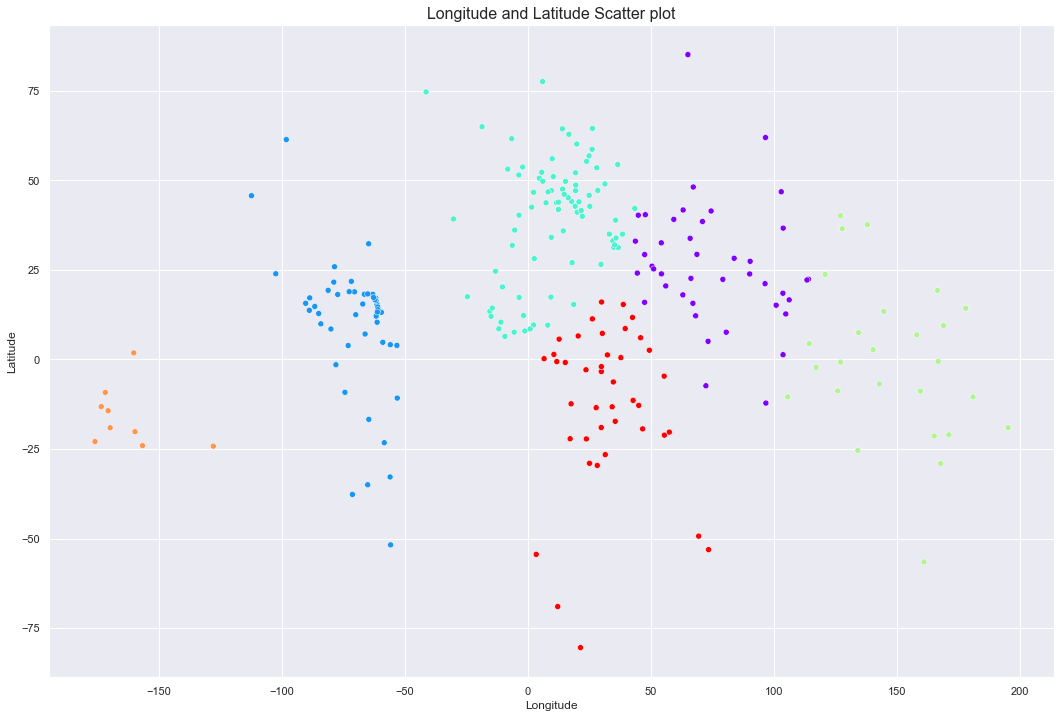

In [11]:
plt.figure(figsize=(18,12))
sns.scatterplot(data['Longitude'], data['Latitude'],c=cluster_data['Cluster'], cmap = 'rainbow')
plt.title('Longitude and Latitude Scatter plot', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

###  We are going to use Folium to view our data point and see if they actually match the world map. 

In [12]:
data_locate = data[["Latitude", "Longitude", "Country"]]
data_locate

,Latitude,Longitude,Country
0,33.831475,66.026218,Afghanistan
1,60.178500,19.915600,Åland Islands
2,41.131809,20.068825,Albania
3,28.164745,2.633512,Algeria
4,-14.304405,-170.707830,American Samoa
...,...,...,...
243,14.293800,178.116500,Wallis and Futuna Islands
244,24.662953,-13.134257,Western Sahara
245,15.965064,47.503053,Yemen
246,-13.453692,27.800396,Zambia


In [13]:
map = folium.Map(location=[data_locate.Latitude.mean(), data_locate.Longitude.mean()], 
                 zoom_start=14, control_scale=True)

In [14]:
for index, location_info in data_locate.iterrows():
    folium.Marker([location_info["Latitude"], location_info["Longitude"]], popup=location_info["Country"]).add_to(map)

In [15]:
map

**The map verifed the accuracy of our clustering.**

## Dealing with Categorical data

In [16]:
# Create a copy of the original dataset
data_mapped = data.copy()
# Map languages with 0, 1,-- and 6. Note that this is not the best way to do that, but for now we will use it 
data_mapped['Language']=data_mapped['Language'].map({'Arabic':0,'English':1,'French':2, 'German':3, 'Portuguese':4, 
                                                    'Spanish':5, 'Others':6,})
# Check if we did it correctly
data_mapped

,CountryCodes,Country,Continent,Latitude,Longitude,Region Code,Language,CountryCurrency
0,AFG,Afghanistan,Asia,33.831475,66.026218,142,6,AFN
1,ALA,Åland Islands,Europe,60.178500,19.915600,150,6,EUR
2,ALB,Albania,Europe,41.131809,20.068825,150,6,ALL
3,DZA,Algeria,Africa,28.164745,2.633512,2,0,DZD
4,ASM,American Samoa,Oceania,-14.304405,-170.707830,9,6,USD
...,...,...,...,...,...,...,...,...
243,WLF,Wallis and Futuna Islands,Oceania,14.293800,178.116500,9,6,XPF
244,ESH,Western Sahara,Africa,24.662953,-13.134257,2,6,MAD
245,YEM,Yemen,Asia,15.965064,47.503053,142,0,YER
246,ZMB,Zambia,Africa,-13.453692,27.800396,2,1,ZMK


In [17]:
x = data_mapped.iloc[:,6:7]
x

,Language
0,6
1,6
2,6
3,0
4,6
...,...
243,6
244,6
245,0
246,1


In [18]:
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(7)

In [19]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x) 

KMeans(n_clusters=7)

### Clustering Resutls

In [20]:
# Create a variable which will contain the predicted clusters for each observation
Language_clusters = kmeans.fit_predict(x)
# Check the result
Language_clusters

array([1, 1, 1, 5, 1, 1, 3, 1, 1, 2, 4, 1, 1, 2, 6, 1, 2, 5, 1, 2, 1, 6,
       2, 0, 1, 1, 4, 1, 1, 2, 1, 3, 1, 1, 1, 0, 2, 1, 0, 2, 3, 1, 0, 0,
       4, 1, 1, 1, 4, 0, 0, 1, 1, 4, 0, 1, 4, 1, 1, 1, 1, 0, 2, 1, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 1, 6, 2, 1, 1, 1, 2,
       1, 1, 4, 1, 0, 3, 2, 0, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 5, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 6, 1, 0, 1, 1,
       1, 2, 1, 1, 0, 2, 2, 1, 5, 2, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 4, 0, 2, 1, 1, 1, 5, 2, 2, 1, 2, 1, 4, 4, 2, 1,
       1, 3, 4, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 3, 5, 0, 1, 2,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2,
       1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 4, 1, 2, 4, 1,
       1, 1, 1, 5, 2, 2])

In [21]:
# Create a copy of the data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = Language_clusters
# Check the result
data_with_clusters.head()

,CountryCodes,Country,Continent,Latitude,Longitude,Region Code,Language,CountryCurrency,Cluster
0,AFG,Afghanistan,Asia,33.831475,66.026218,142,Others,AFN,1
1,ALA,Åland Islands,Europe,60.178500,19.915600,150,Others,EUR,1
2,ALB,Albania,Europe,41.131809,20.068825,150,Others,ALL,1
3,DZA,Algeria,Africa,28.164745,2.633512,2,Arabic,DZD,5
4,ASM,American Samoa,Oceania,-14.304405,-170.707830,9,Others,USD,1


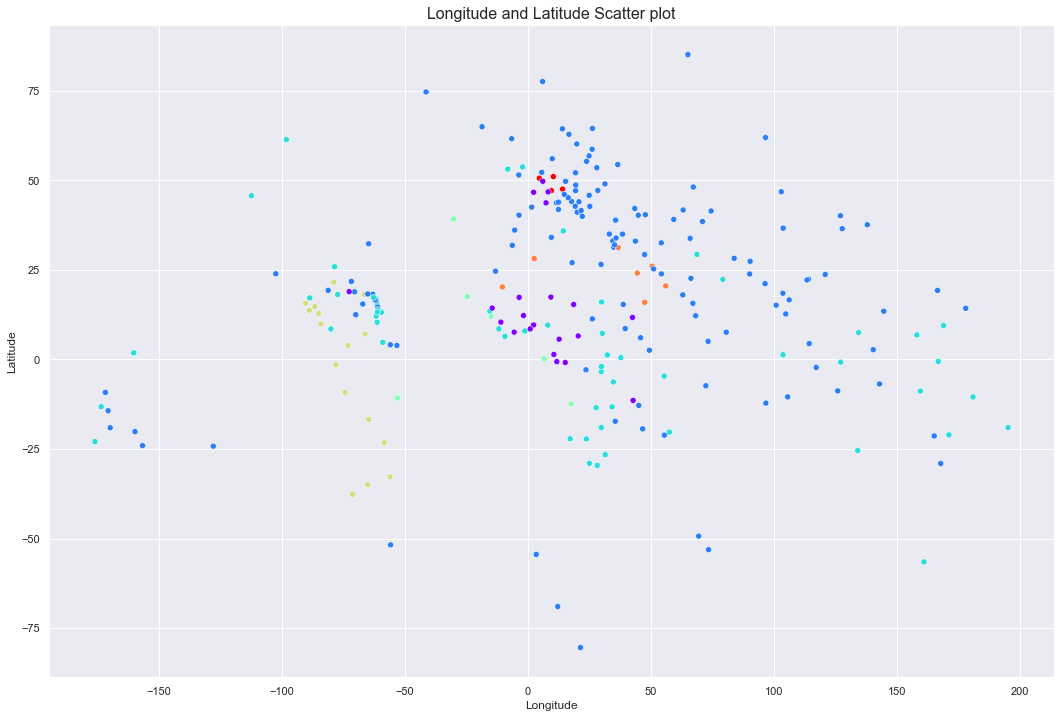

In [22]:
plt.figure(figsize=(18,12))
sns.scatterplot(data['Longitude'], data['Latitude'],c=data_with_clusters['Cluster'], cmap = 'rainbow')
plt.title('Longitude and Latitude Scatter plot', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

## Selecting the number of clusters

In [23]:
#  A model’s inertia is accessible via the inertia_ instance variable
kmeans.inertia_

2.176664452731077e-27

In [24]:
# Write a loop that calculates number of clusters from 0 up to 6 
inertias = []
num = 15
for i in range (1,num):
    kmeans= KMeans(i)
    kmeans.fit(x)
    inertias_iter = kmeans.inertia_
    inertias.append(inertias_iter)

In [25]:
inertias

[1268.8346774193553,
 73.63098014274607,
 40.15565610859729,
 13.958011363636363,
 8.634375,
 2.4000000000000004,
 2.176664452731077e-27,
 2.176664452731077e-27,
 1.9672711862014745e-27,
 2.176664452731077e-27,
 2.176664452731077e-27,
 1.9672711862014745e-27,
 2.176664452731077e-27,
 1.9672711862014745e-27]

### Accelerated K-Means 

In [26]:
%timeit -n 20 KMeans(algorithm="elkan").fit(x)

21.1 ms ± 99.8 µs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [27]:
%timeit -n 20 KMeans(algorithm="full").fit(x) 

456 ms ± 3.43 ms per loop (mean ± std. dev. of 7 runs, 20 loops each)


### The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

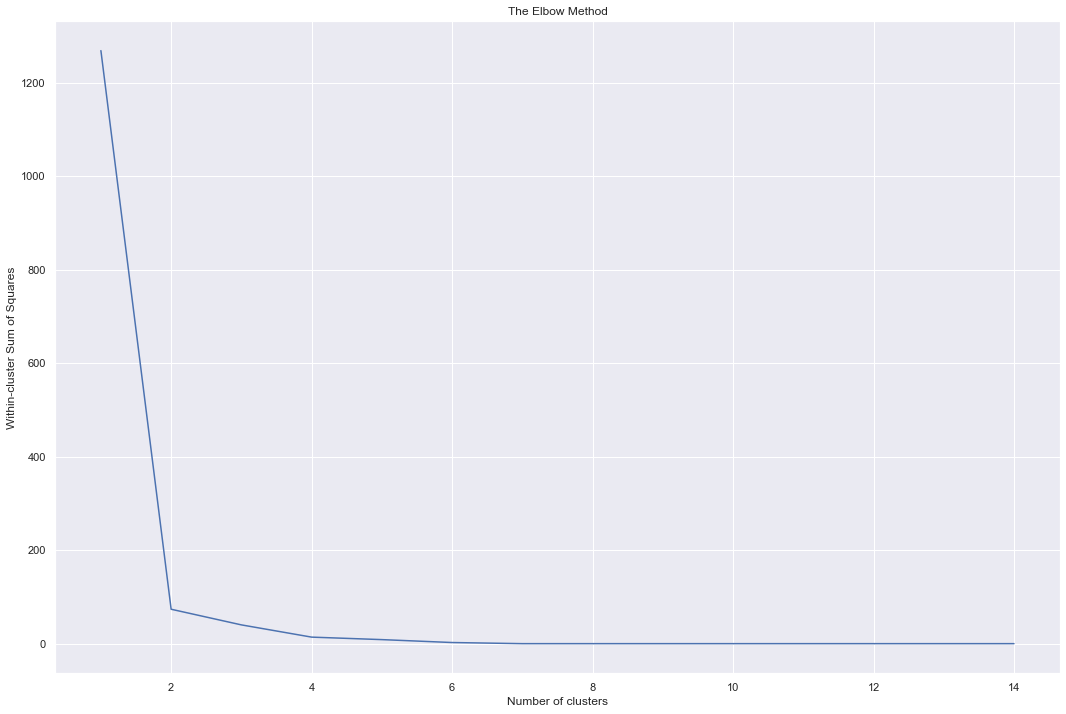

In [28]:
plt.figure(figsize=(18,12))
number_clusters = range(1,num)
plt.plot(number_clusters, inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')

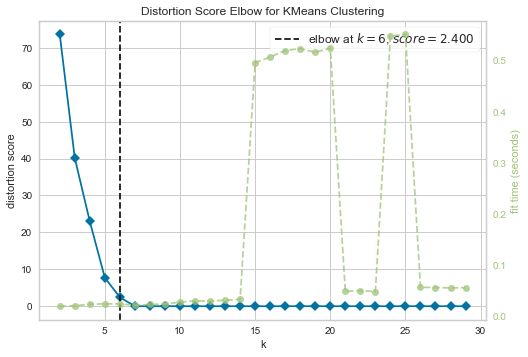

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(x)        
visualizer.show()        

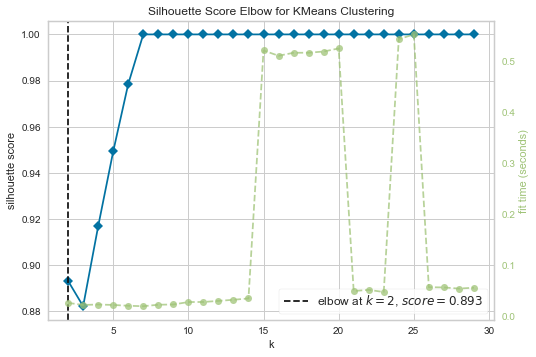

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [30]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,30),metric='silhouette', timings= True)
visualizer.fit(x)        
visualizer.show()       

### Mini-Batch K-Means

In [31]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(x)
minibatch_kmeans.inertia_

8.634745428790144

**It is important to note that the Mini-batch K-Means algorithm is much faster than the regular K-Means algorithm,
its inertia is generally slightly worse, especially as the number of clusters increases.**

## Clustering (unscaled data)

In [32]:
# Load the data
data = pd.read_csv('iris_dataset.csv')
# Check the data
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [33]:
# create a variable which will contain the data for the clustering
x = data.copy()
# create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)

KMeans(n_clusters=2)

In [34]:
# create a copy of data, so we can see the clusters next to the original data
clusters = data.copy()
# predict the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)

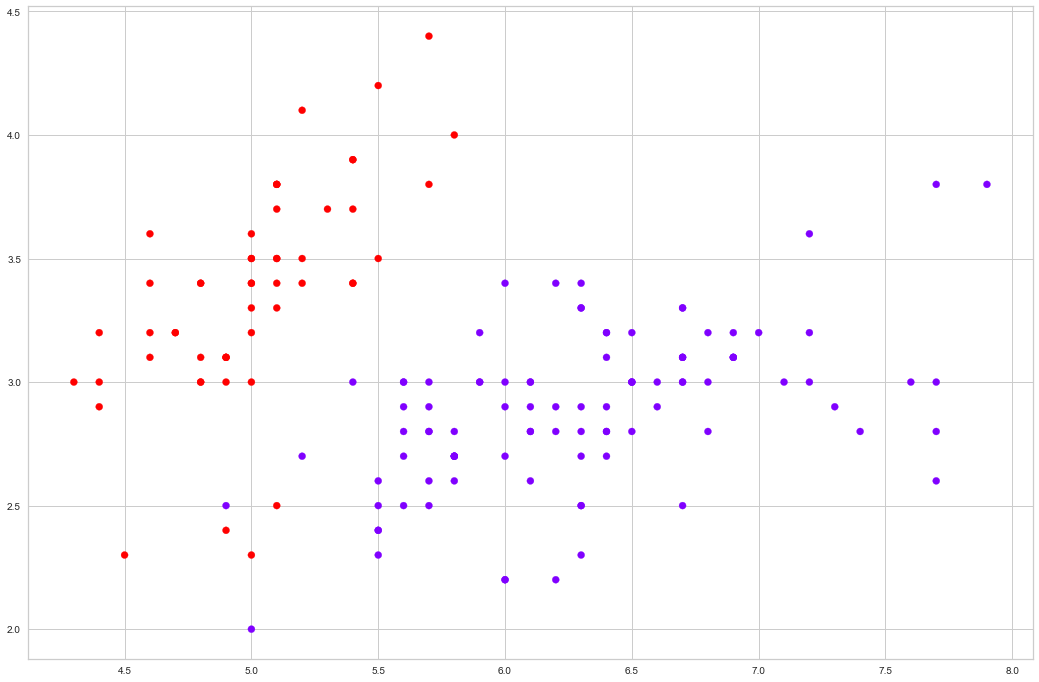

In [35]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.figure(figsize=(18,12))
plt.scatter(clusters['sepal_length'], clusters['sepal_width'], c= clusters ['cluster_pred'], cmap = 'rainbow')

## Standardize the variables

In [36]:
# import some preprocessing module
from sklearn import preprocessing

# scale the data for better results
x_scaled = preprocessing.scale(data)

In [37]:
# create a k-means object with 2 clusters
kmeans_scaled = KMeans(2)
# fit the data
kmeans_scaled.fit(x_scaled)

KMeans(n_clusters=2)

In [38]:
# create a copy of data, so we can see the clusters next to the original data
clusters_scaled = data.copy()
# predict the cluster for each observation
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

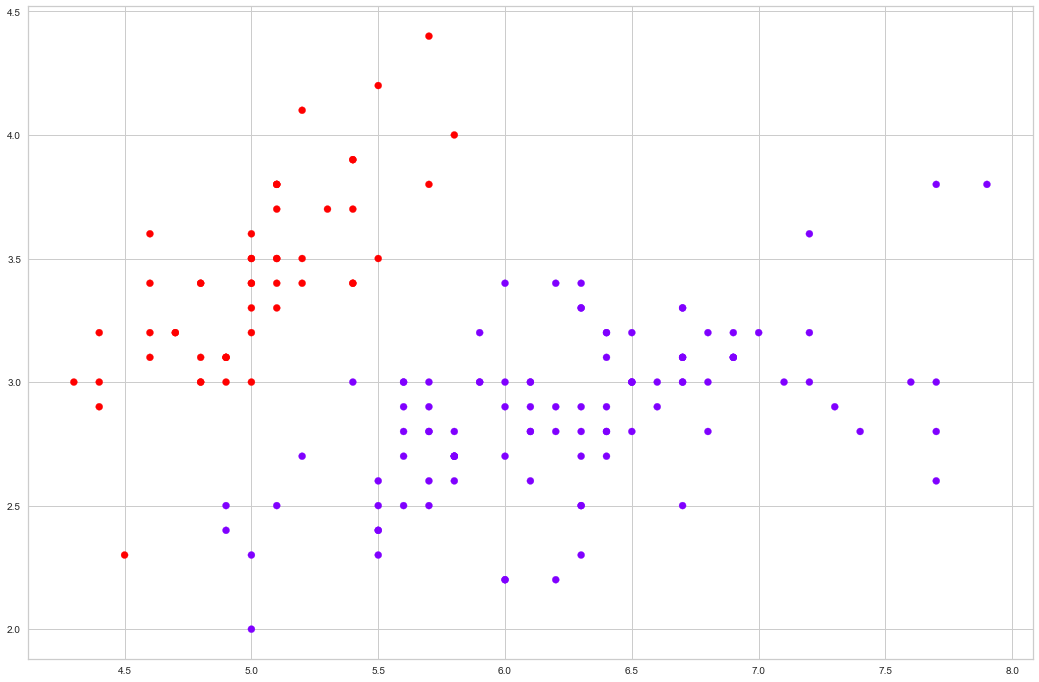

In [39]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.figure(figsize=(18,12))
plt.scatter(clusters_scaled['sepal_length'], clusters_scaled['sepal_width'], 
            c= clusters_scaled ['cluster_pred'], cmap = 'rainbow')

In [40]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(x_scaled)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
wcss

[600.0,
 223.73200573676345,
 141.15417813388652,
 114.42714544645857,
 91.0380373253263,
 80.24972235577131,
 70.95875903826985,
 62.78233511500303,
 55.67393335353543]

Text(0, 0.5, 'Within-cluster Sum of Squares')

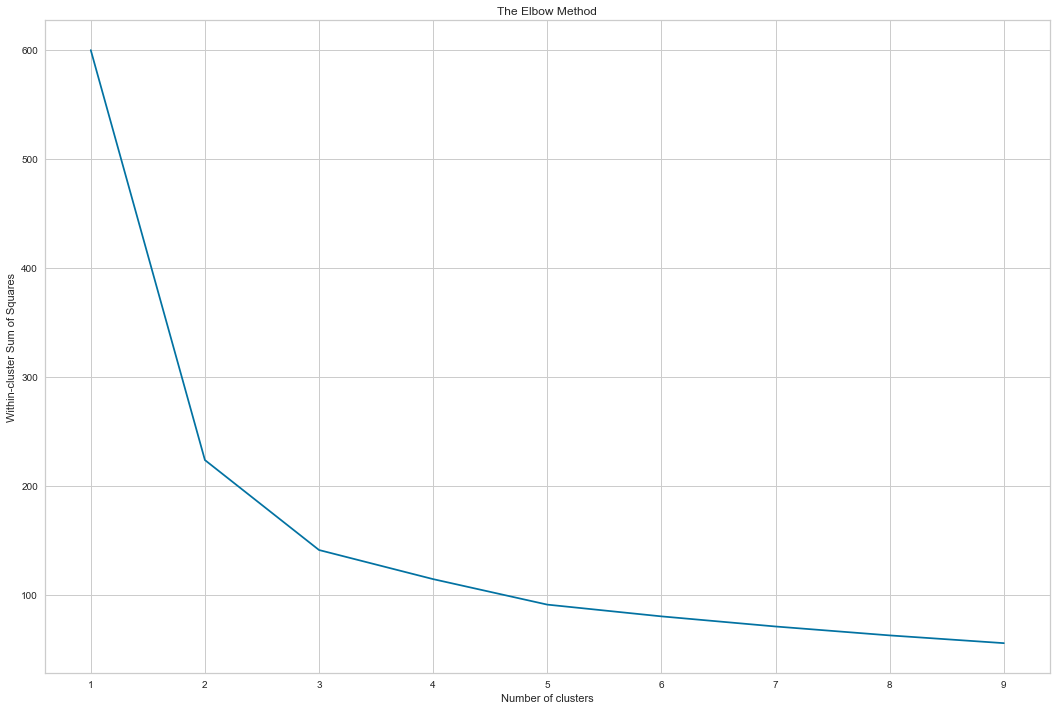

In [41]:
plt.figure(figsize=(18,12))
number_clusters = range(1,cl_num)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')